In [26]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import time

#definimos nuestras unidades
um = 1e-6 #micrometros
mm = 1e-3 #milimetros
nm= 1e-9 #nanometros

w_length = 650*nm #longitud de onda de luz roja monocromática y coherente
dx=dy=100*um #tamaño de pixel que se considera

In [24]:
def T_AproxEA(T_f,dx_f,dy_f,z_f,wave_length):
  '''
  sea T_f: la transmirancia que le voy a  ingresar, equivalente al U_0
  '''
  #tomamos el contenido freq de la imagen
  T_freq=np.fft.fftshift(np.fft.fft2(T_f))

  #definimos el espacio coordenado
  N_f, M_f = np.shape(T_f)
  
  x=np.arange(-int(M_f/2),int(M_f/2)+1,1)
  y=np.arange(-int(N_f/2),int(N_f/2)+1,1)
  X,Y= np.meshgrid(x,y)

  #damos dimensiones de mundo
 
  fx=X*(1/(M_f*dx_f))*wave_length
  fy=Y*(1/(N_f*dy_f))*wave_length

  k=2*np.pi/wave_length

  C1 = (1j*k*z_f)#/(1j*wave_Length*z_f)
  C2 = -1j*np.pi*wave_length*z_f

  
  mat = np.exp(C1*(1-(fx**2)-(fy**2))**1/2)
  freq_p = T_freq*mat
  
  freq_p=np.fft.ifft2(freq_p)
    
    
  return freq_p

Tomada de https://es.vexels.com/png-svg/vista-previa/218221/silueta-de-gafas-de-sol-con-montura-cuadrada


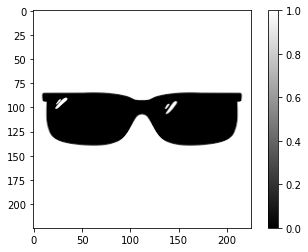

In [3]:
T = cv2.imread("gafas.png",0)
T = T/np.max(T)

plt.figure()
plt.imshow(T,cmap="gray")
plt.colorbar()
plt.show
print('Tomada de https://es.vexels.com/png-svg/vista-previa/218221/silueta-de-gafas-de-sol-con-montura-cuadrada')

El proceso tardó: 0.038999080657958984 s


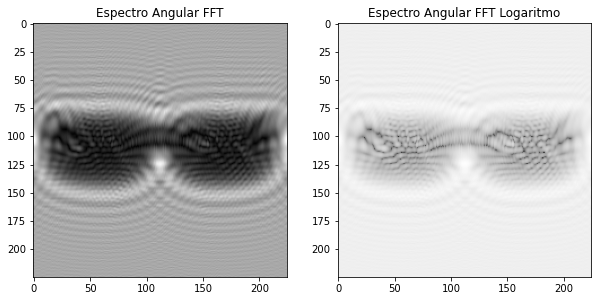

In [30]:
z=4000*mm

#contar tiempo
start = time.time()

#Transformada de Fresnel FFT
sc=T_AproxEA(T,dx,dy,z,w_length)

#finaliza tiempo
end = time.time()
print('El proceso tardó:', end - start,'s')

fig, arreglo_plots = plt.subplots(1,2, figsize=(10, 7))
arreglo_plots[0].set_title('Espectro Angular FFT')
arreglo_plots[0].imshow(np.abs(sc),cmap='gray')
arreglo_plots[1].set_title('Espectro Angular FFT Logaritmo')
arreglo_plots[1].imshow(np.log(np.abs(sc)),cmap='gray')